<h1>Linear Algebra (CpE210A)

<h3>Midterms Project

Coded and submitted by:<br>
<i>Roa, Danica Kate I.<br>
    201811457<br>
58010 </i>

Directions
This Jupyter Notebook will serve as your base code for your Midterm Project. You must further format and provide complete discussion on the given topic. 
- Provide all necessary explanations for specific code blocks. 
- Provide illustrations for key results.
- Observe clean code (intuitive variable names, proper commenting, proper code spacing)
- Provide a summary discussion at the end

Failure to use this format or failure to update the document will be given a deduction equivalent to 50% of the original score. 

### Case

Bebang is back to consult you about her business. Furthering her data analytics initiative she asks you for help to compute some relevant data. Now she is asking you to compute and visualize her sales and costs for the past year. She has given you the datasets attached to her request.

### Problem

State and explain Bebang's problem here and provide the deliverables.

# Proof of Concept

Now that you have a grasp on the requirements we need to start with making a program to prove that her problem is solvable. As a Linear Algebra student, we will be focusin on applying vector operations to meet her needs. First, we need to import her data. We will use the `pandas` library for this. For more information you can look into their documentation [here](https://pandas.pydata.org/).

In [1]:
import pandas as pd

file_prices = "bebang prices.csv"
file_sales = "bebang sales.csv"

df_prices = pd.read_csv(file_prices, index_col=0)
df_sales = pd.read_csv(file_sales)


## Let's check what's in df_prices
df_prices

,red velvet,oreo,sugar glazed,almond honey,matcha,strawberry cream,brown sugar boba,furits and nuts,dark chocolate,chocolate and orange,choco mint,choco butter naught
price per piece,35,25,20,35,50,40,40,45,30,40,45,45
cost per piece,25,15,10,20,35,31,30,25,15,25,32,31


In [2]:
## Let's check the sales dataframe
df_sales

,flavor,january,february,march,april,may,june,july,august,september,october,november,december
0,red velvet,781,524,364,157,894,56,89,41,23,78,231,899
1,oreo,210,324,344,32,123,1,3,0,1,6,312,548
2,sugar glazed,599,674,854,14,467,78,36,48,75,98,781,1602
3,almond honey,124,112,114,23,198,12,32,41,23,36,300,566
4,matcha,645,498,885,98,177,98,43,96,26,71,549,897
5,strawberry cream,210,372,369,78,163,26,45,22,54,41,207,456
6,brown sugar boba,981,380,154,14,147,15,98,33,23,36,552,633
7,furits and nuts,478,462,354,49,89,0,1,0,1,8,335,214
8,dark chocolate,598,203,36,96,789,4,5,0,8,0,789,458
9,chocolate and orange,324,123,48,32,65,74,78,45,89,100,632,231


## Part 1: Monthly Sales

In [3]:
import numpy as np
### Vectorizing the data

sales_mat = np.array(df_sales.set_index('flavor'))
prices_mat = np.array(df_prices)[0] ## reshape this vector to the appropriate size
costs_mat = np.array(df_prices)[1] ## reshape this vector to the appropriate size


## Do not alter these lines
print(sales_mat.shape)
print(prices_mat.shape)
print(costs_mat.shape)
# Expected Output
# (12, 12)
# (12, 1)
# (12, 1)

(12, 12)
(12,)
(12,)


#### Formulas

Take note that the fomula for revenue is: <br>
$revenue = sales * price $ <br>
In this case, think that revenue, sales, and price are vectors instead of individual values <br>
The formula of cost per item sold is: <br>
$cost_{sold} = sales * cost$ <br>
The formula for profit is: <br>
$profit = revenue - cost_{sold}$ <br>
Solving for the monthly profit will be the sum of all profits made on that month.

In [4]:
#Create a function that *returns* and prints the monthly sales and profit for each month 
def monthly_sales(price, cost, sales):
    monthly_revenue = sales * price 
    monthly_costs = sales * cost
    monthly_profits = monthly_revenue - monthly_costs
    return monthly_revenue.flatten(), monthly_costs.flatten(), monthly_profits.flatten()

In [5]:
### Do not alter this cell
month_rev, month_cost, month_profit = monthly_sales(prices_mat, costs_mat, sales_mat)
print(f'Monthly Revenue: \n {month_rev}')
print(f'Monthly Cost: \n {month_cost}')
print(f'Monthly Profit \n {month_profit}')

Monthly Revenue: 
 [ 27335  13100   7280   5495  44700   2240   3560   1845    690   3120
  10395  40455   7350   8100   6880   1120   6150     40    120      0
     30    240  14040  24660  20965  16850  17080    490  23350   3120
   1440   2160   2250   3920  35145  72090   4340   2800   2280    805
   9900    480   1280   1845    690   1440  13500  25470  22575  12450
  17700   3430   8850   3920   1720   4320    780   2840  24705  40365
   7350   9300   7380   2730   8150   1040   1800    990   1620   1640
   9315  20520  34335   9500   3080    490   7350    600   3920   1485
    690   1440  24840  28485  16730  11550   7080   1715   4450      0
     40      0     30    320  15075   9630  20930   5075    720   3360
  39450    160    200      0    240      0  35505  20610  11340   3075
    960   1120   3250   2960   3120   2025   2670   4000  28440  10395
  16030  10300   1560   2730   3900    280    120    360     60     40
  14535  25380  27230  14650  12900   3500  49350   2520  

## Part 2: Flavor Sales

In [6]:
#Create a function that *returns* and prints the flavor profits for the whole year 
def flavor_sales(price, cost, sales):
    flavor_revenue = sales * price
    flavor_costs = sales * cost
    flavor_profits = flavor_revenue - flavor_costs 
    return flavor_profits.flatten()

In [7]:
### Do not alter this cell
flavor_profit = flavor_sales(prices_mat, costs_mat, sales_mat)
print(f'Profits of Flavors:\n{flavor_profit}')

Profits of Flavors:
[ 7810  5240  3640  2355 13410   504   890   820   345  1170  3003 12586
  2100  3240  3440   480  1845     9    30     0    15    90  4056  7672
  5990  6740  8540   210  7005   702   360   960  1125  1470 10153 22428
  1240  1120  1140   345  2970   108   320   820   345   540  3900  7924
  6450  4980  8850  1470  2655   882   430  1920   390  1065  7137 12558
  2100  3720  3690  1170  2445   234   450   440   810   615  2691  6384
  9810  3800  1540   210  2205   135   980   660   345   540  7176  8862
  4780  4620  3540   735  1335     0    10     0    15   120  4355  2996
  5980  2030   360  1440 11835    36    50     0   120     0 10257  6412
  3240  1230   480   480   975   666   780   900  1335  1500  8216  3234
  4580  4120   780  1170  1170    63    30   160    30    15  4199  7896
  7780  5860  6450  1500 14805   567   360  1780  1170  1485 10192 32340]


In [8]:
flavors=["red velvet","oreo","sugar glazed","almond honey","matcha","strawberry cream","brown sugar boba",
         "furits and nuts","dark chocolate","chocolate and orange","choco mint","choco butter naught"]

best_3_flavors = sorted(zip(flavor_profit,flavors),reverse = True)[0:3] ## This would sort out the best flavor base on their profit
print("The best 3 flavors are :", best_3_flavors)
worst_3_flavors = sorted(zip(flavor_profit,flavors))[0:3] ## This would sort out the worst flavor base on their profit
print("The 3 worst flavors are:", worst_3_flavors)

The best 3 flavors are : [(13410, 'matcha'), (12586, 'choco butter naught'), (7810, 'red velvet')]
The 3 worst flavors are: [(345, 'dark chocolate'), (504, 'strawberry cream'), (820, 'furits and nuts')]


## Part 3: Visualizing the Data (Optional for +40%)
You can try to visualize the data in the most comprehensible chart that you can use.

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

#### Entire Dataset

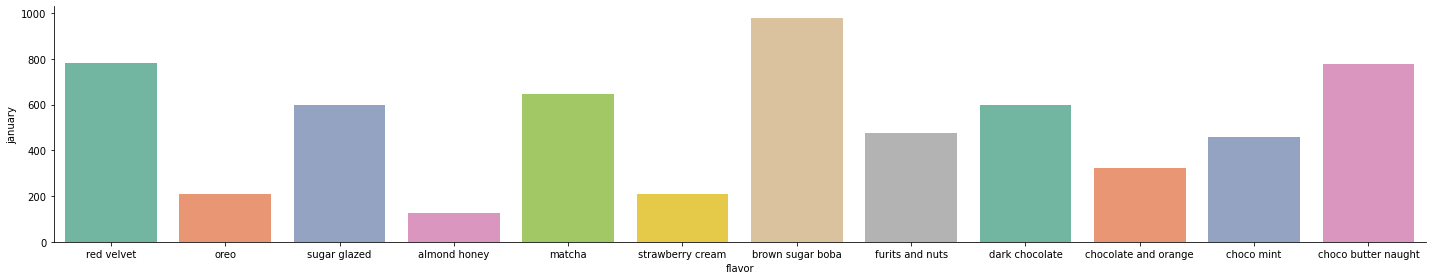

In [10]:
sns.catplot(x='flavor',y ="january",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

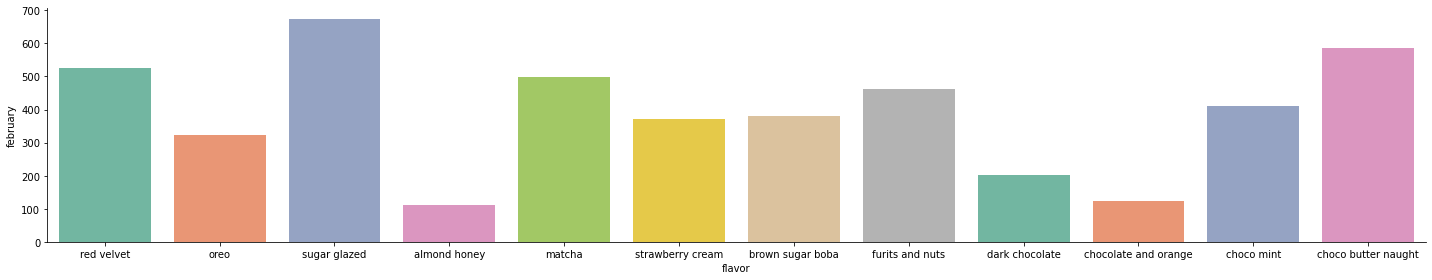

In [11]:
sns.catplot(x='flavor',y ="february",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

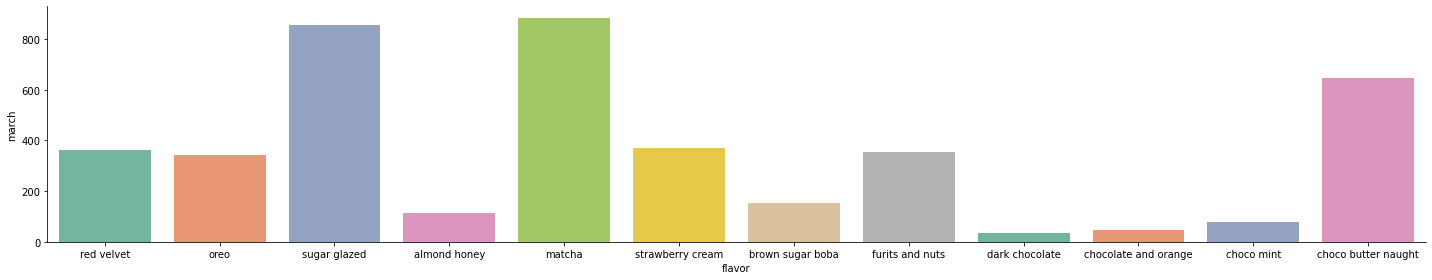

In [12]:
sns.catplot(x='flavor',y ="march",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

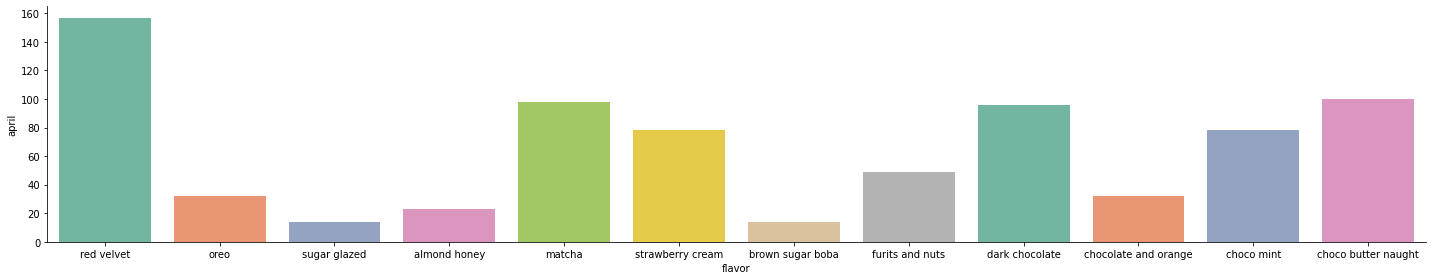

In [13]:
sns.catplot(x='flavor',y ="april",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

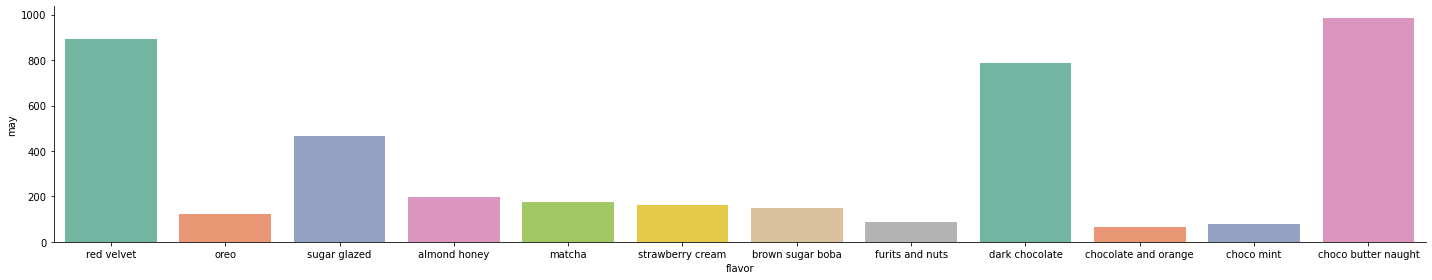

In [14]:
sns.catplot(x='flavor',y ="may",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

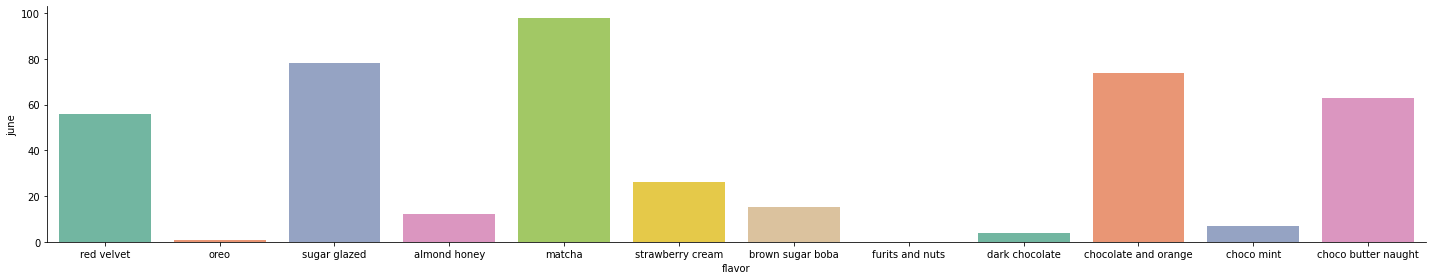

In [15]:
sns.catplot(x='flavor',y ="june",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

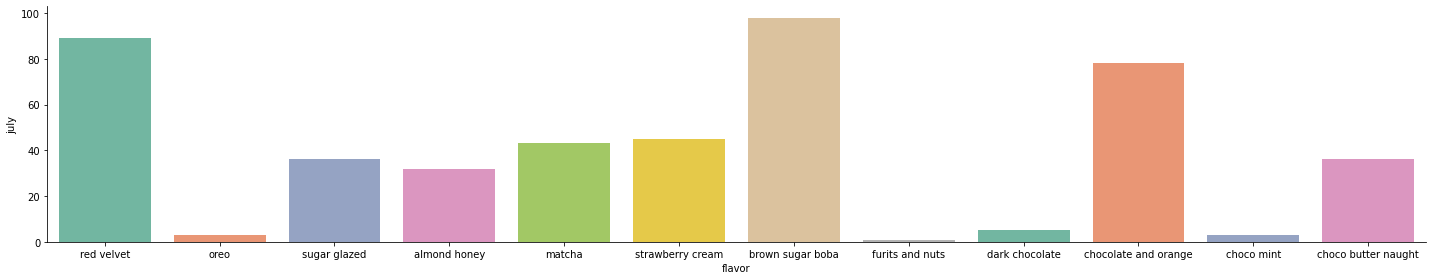

In [16]:
sns.catplot(x='flavor',y ="july",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

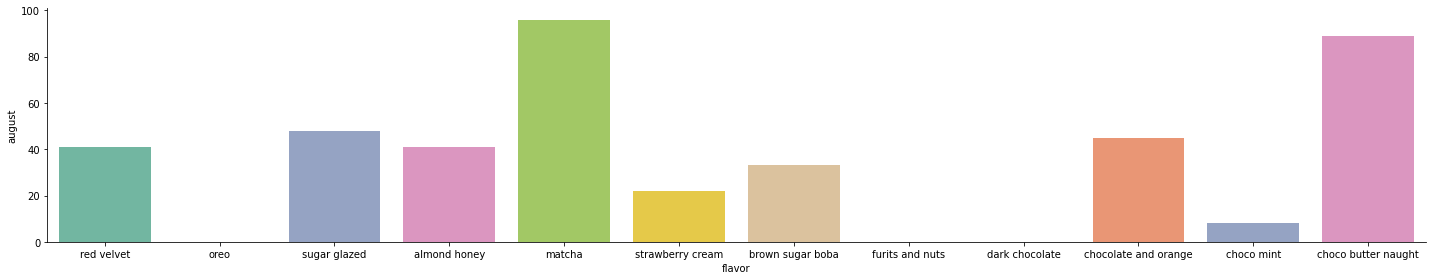

In [17]:
sns.catplot(x='flavor',y ='august',
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

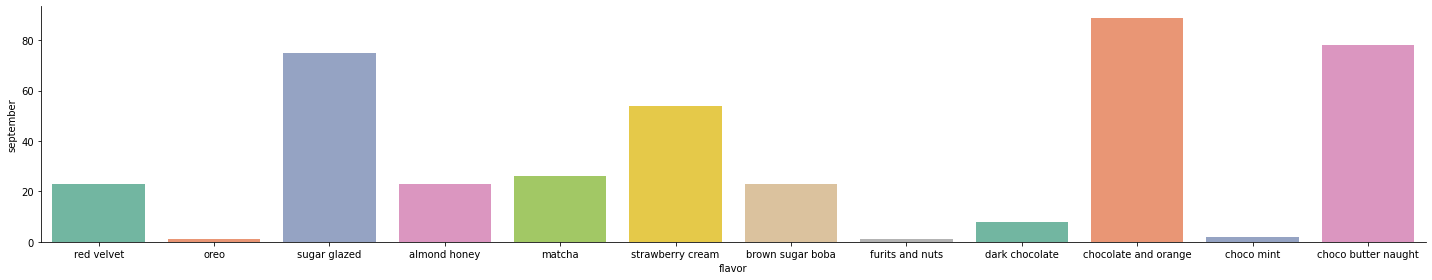

In [18]:
sns.catplot(x='flavor',y ="september",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

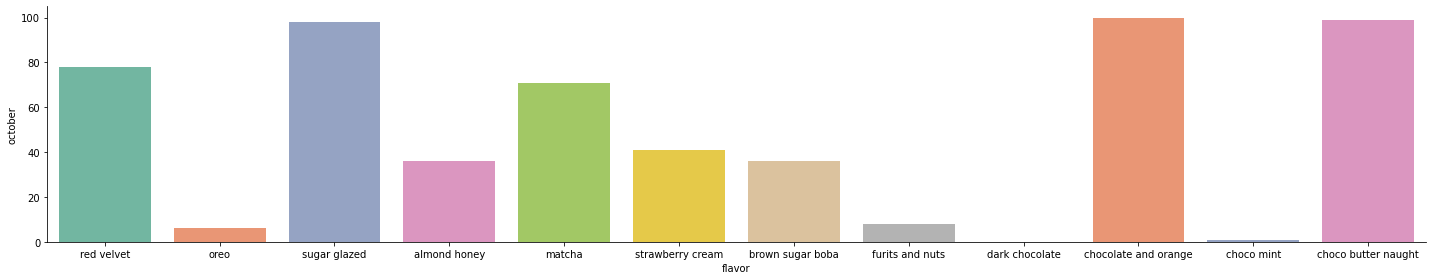

In [19]:
sns.catplot(x='flavor',y ="october",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

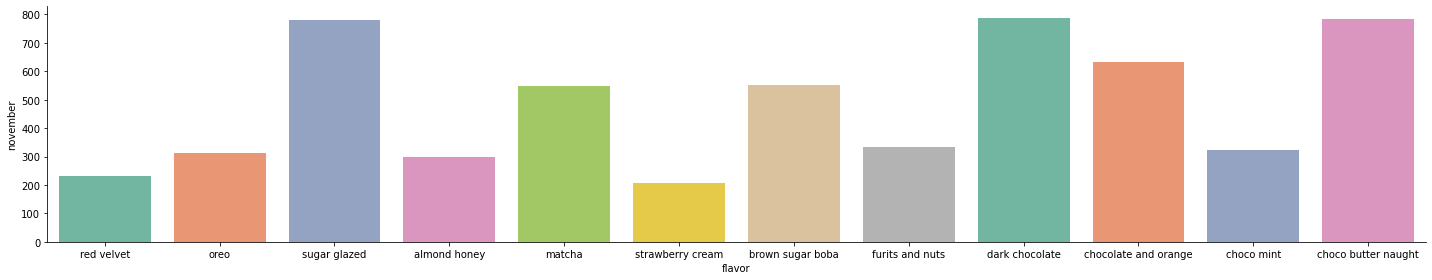

In [20]:
sns.catplot(x='flavor',y ="november",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

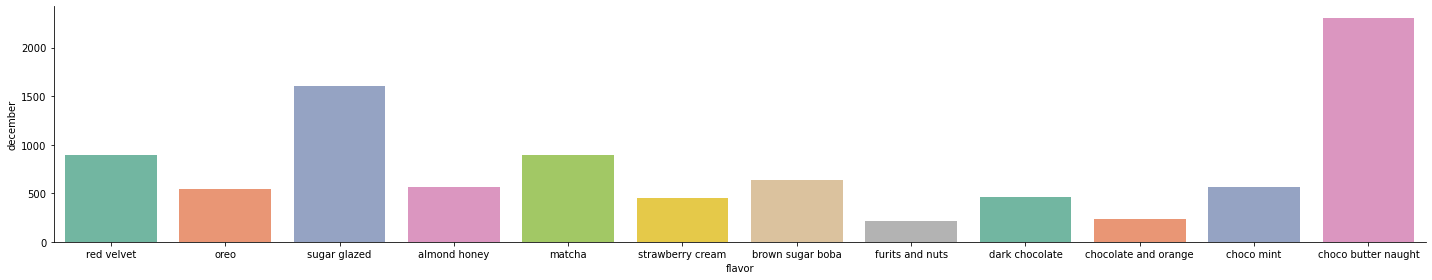

In [21]:
sns.catplot(x='flavor',y ="december",
                data = df_sales, palette = 'Set2', kind ="bar",
                height = 4, aspect = 5);

#### Monthly Sales

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot("month","sales", data=monthly_sale,palette='Set1')

NameError: name 'monthly_sale' is not defined

In [ ]:
sns.catplot(x = 'Total Sales Per Month', y = 'Total Profit Per Month',
                data = df_profit_sales_per_month, palette = 'Set2', kind ="bar",
                height = 4, aspect = 4);

#### Flavor Sales

In [ ]:
bebang_flavors_sales = ('/content/bebang_flavors_profit.csv')
df_profit_per_flavor = pd.read_csv(bebang_flavors_sales)

In [ ]:
sns.catplot(x = 'Flavors', y = 'Total Profit Per Flavor',
                data = df_profit_per_flavor, palette = 'Set2', kind ="bar",
                height = 4, aspect=5);

## Part 4: Business Recommendation and Conclusion
Present the findings of your data analysis and provide recommendations

Add your statement here